In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np


In [2]:
import pandas as pd
data=pd.read_csv(r"D:\Users\DELL\Desktop\4th Sem notes\bv\Iris_Data.csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris = load_iris()

In [5]:
X = iris.data[:, :2]

In [6]:
y = (iris.target == 0).astype(int)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n Performance Metrics")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1-score:  {f1_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


 Performance Metrics
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-score:  1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



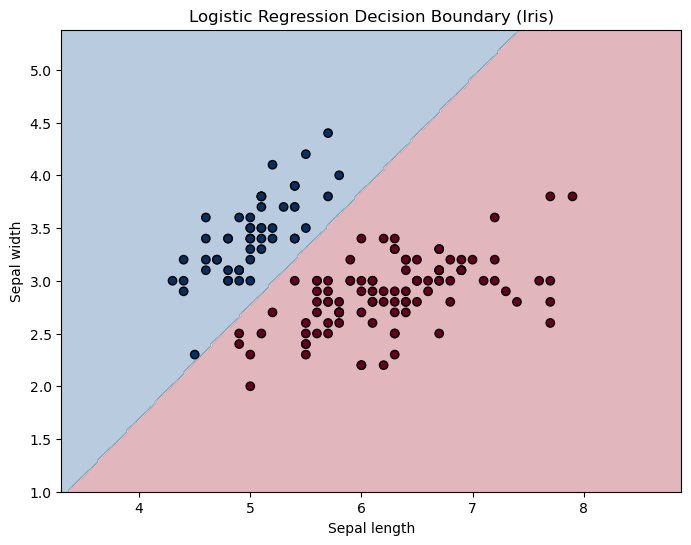

In [15]:
#dicision visualization
import matplotlib.pyplot as plt

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Logistic Regression Decision Boundary (Iris)')
plt.show()

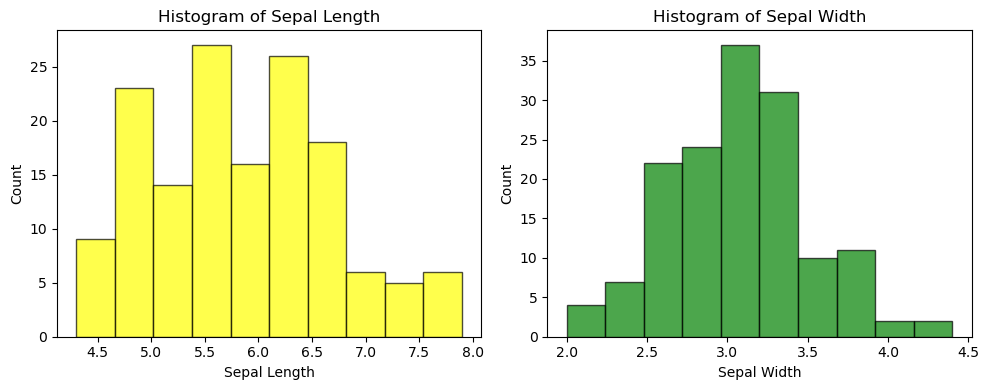

In [17]:
plt.figure(figsize=(10, 4))

# Histogram for Sepal Length
plt.subplot(1, 2, 1)
plt.hist(X[:, 0], bins=10, color='yellow', alpha=0.7, edgecolor='black')
plt.xlabel('Sepal Length')
plt.ylabel('Count')
plt.title('Histogram of Sepal Length')

# Histogram for Sepal Width
plt.subplot(1, 2, 2)
plt.hist(X[:, 1], bins=10, color='green', alpha=0.7, edgecolor='black')
plt.xlabel('Sepal Width')
plt.ylabel('Count')
plt.title('Histogram of Sepal Width')

plt.tight_layout()
plt.show()